# Показать возможности Jupyter на примере реальной задачи на данных, полученных из Elasticsearch обычным запросом и сохраненным в файл .json

In [1]:
#  блок импорта
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
# чтение данных из файла
with open('data_download.json', 'r', encoding='utf-8') as file:
    data = json.load(file)
data

[{'_index': 'services_showcase_1',
  '_type': '_doc',
  '_id': 'yAqAB<гAAbAAA18:40B#',
  '_score': 2.0,
  '_source': {'idStatusLong': 'yAqAB<гAAbAAA18:40B#',
   'RSpID': 'ЦАХ_103',
   'composite_key': 'ГП№107|ЦАХ_103|24',
   'Mosr': 'экстренная',
   'pu': 'Операции',
   'pKDiag': 'M70.4 Препателлярный бурсит',
   'idEpisodLong': 'yAqAB<гAAb',
   'pAz': 'Абрамов_Юрий_Анатольевич',
   'pID': 'ЦАХ_103',
   'panv': 'местная_инфильтрационная_анестезия',
   'pie': 'Выписан',
   'fio': 'Йббцйвха_Диимюехп_Ймумгтмю',
   'pu1': 'Операции_на_коже_и_подкожной_клетчатке',
   'pB': '23042/A16',
   'partOfdata': '2023-03-02 16:47:46',
   'pAG': '20200630',
   'X': {'datetime': '20210927 13:17:06'},
   'pAE_186': '20200622',
   'pJ': 'Рьаыъйг',
   'sn': '196-262-591 38',
   'n656': 'Персонал',
   'pAN': 'ПРОТОКОЛ_ОПЕРАЦИИ',
   'datqq_174': '20200622',
   'pANdop': 'выполнено',
   'idServiceLong': 'yAqAB<гAAbAAA18:40B',
   'pDatop': '20200622',
   'pAX': '2949/ДС2020',
   'puR': 'Врач-хирург',
   'pvs'

In [3]:
# получаем список словарей по ключу _source
data_load = []
for rec in data:
    data_load.append(rec['_source'])
data_load

[{'idStatusLong': 'yAqAB<гAAbAAA18:40B#',
  'RSpID': 'ЦАХ_103',
  'composite_key': 'ГП№107|ЦАХ_103|24',
  'Mosr': 'экстренная',
  'pu': 'Операции',
  'pKDiag': 'M70.4 Препателлярный бурсит',
  'idEpisodLong': 'yAqAB<гAAb',
  'pAz': 'Абрамов_Юрий_Анатольевич',
  'pID': 'ЦАХ_103',
  'panv': 'местная_инфильтрационная_анестезия',
  'pie': 'Выписан',
  'fio': 'Йббцйвха_Диимюехп_Ймумгтмю',
  'pu1': 'Операции_на_коже_и_подкожной_клетчатке',
  'pB': '23042/A16',
  'partOfdata': '2023-03-02 16:47:46',
  'pAG': '20200630',
  'X': {'datetime': '20210927 13:17:06'},
  'pAE_186': '20200622',
  'pJ': 'Рьаыъйг',
  'sn': '196-262-591 38',
  'n656': 'Персонал',
  'pAN': 'ПРОТОКОЛ_ОПЕРАЦИИ',
  'datqq_174': '20200622',
  'pANdop': 'выполнено',
  'idServiceLong': 'yAqAB<гAAbAAA18:40B',
  'pDatop': '20200622',
  'pAX': '2949/ДС2020',
  'puR': 'Врач-хирург',
  'pvs': 'ДН._СТАЦИОНАР',
  'pPN': '18:40',
  'Mnameoper': 'вскрытие суставной сумки левогг коленого сустава',
  'pIDo': 'ГП№107',
  'Du': 'A16.01.029.

In [4]:
# на основе полученного списка словарей создаем DataFrame 
# табличную структуру данных, стандарт для передачи в любую БД
df = pd.DataFrame(data_load)
# небольшая подработка - убираем вложенность в одном из полей DataFrame - поле Х просто получает свое значение напрямую
df['datetime'] = df.X.apply(lambda x: x['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3061 entries, 0 to 3060
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   idStatusLong   3061 non-null   object
 1   RSpID          2031 non-null   object
 2   composite_key  2031 non-null   object
 3   Mosr           3038 non-null   object
 4   pu             2915 non-null   object
 5   pKDiag         2180 non-null   object
 6   idEpisodLong   3061 non-null   object
 7   pAz            3061 non-null   object
 8   pID            3061 non-null   object
 9   panv           3061 non-null   object
 10  pie            1374 non-null   object
 11  fio            3061 non-null   object
 12  pu1            2894 non-null   object
 13  pB             3061 non-null   object
 14  partOfdata     3061 non-null   object
 15  pAG            1353 non-null   object
 16  X              3061 non-null   object
 17  pAE_186        2529 non-null   object
 18  pJ             3061 non-null

In [5]:
# удаляем поле Х
df = df.drop('X', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3061 entries, 0 to 3060
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   idStatusLong   3061 non-null   object
 1   RSpID          2031 non-null   object
 2   composite_key  2031 non-null   object
 3   Mosr           3038 non-null   object
 4   pu             2915 non-null   object
 5   pKDiag         2180 non-null   object
 6   idEpisodLong   3061 non-null   object
 7   pAz            3061 non-null   object
 8   pID            3061 non-null   object
 9   panv           3061 non-null   object
 10  pie            1374 non-null   object
 11  fio            3061 non-null   object
 12  pu1            2894 non-null   object
 13  pB             3061 non-null   object
 14  partOfdata     3061 non-null   object
 15  pAG            1353 non-null   object
 16  pAE_186        2529 non-null   object
 17  pJ             3061 non-null   object
 18  sn             2495 non-null

## Проводим выборочный анализ наличия пустых ячеек в таблице по выбранным полям

In [6]:
df['Mnameoper'].isnull().sum()

372

In [7]:
df['pAnaes'].isnull().sum()

2561

**Вывод:**  
* в некотрых полях очень много пустых значений, если будет задача по ML, то такие поля, возможно, лучше будет удалить, т.к. восстановить их вряд ли будет возможно.
* в других полях немного пустых значений, т.е. там можно подумать, чем заполнить вместо NaN

## Первая сводная таблица по видам анестезии

In [8]:
cnt = pd.DataFrame(df['panv'].value_counts()).reset_index()
cnt['index'] = cnt['index'].apply(lambda x: x.strip(':'))
cnt

index  panv
0                  местная_инфильтрационная_анестезия  1658
1                                  местная_анестезия    470
2                                      без_анестезии    398
3                                    общая_анестезия    196
4                                 внутривенный_наркоз    93
5                              терминальная_анестезия    58
6                              эндотрахеальный_наркоз    57
7                     ингаляционный_(масочный)_наркоз    43
8        внутривенный_наркоз , эндотрахеальный_наркоз    20
9                                спинальная_анестезия    18
10           внутривенный_наркоз ; местная_анестезия     16
11             общая_анестезия : ; местная_анестезия     14
12  терминальная_анестезия , местная_инфильтрацион...     8
13  внутривенный_наркоз местная_инфильтрационная_а...     4
14           внутривенный_наркоз спинальная_анестезия     2
15      эндотрахеальный_наркоз эпидуральная_анестезия     1
16                             эпидуральная_анестезия     1
17  общая_анестезия : местная_инфильтрационная_ане...     1
18           общая_анестезия : эпидуральная_анестезия     1
19  внутривенный_наркоз эпидуральная_анестезия , с...     1
20  внутривенный_наркоз , ингаляционный_(масочный)...     1

## Визуализация данных по таблице

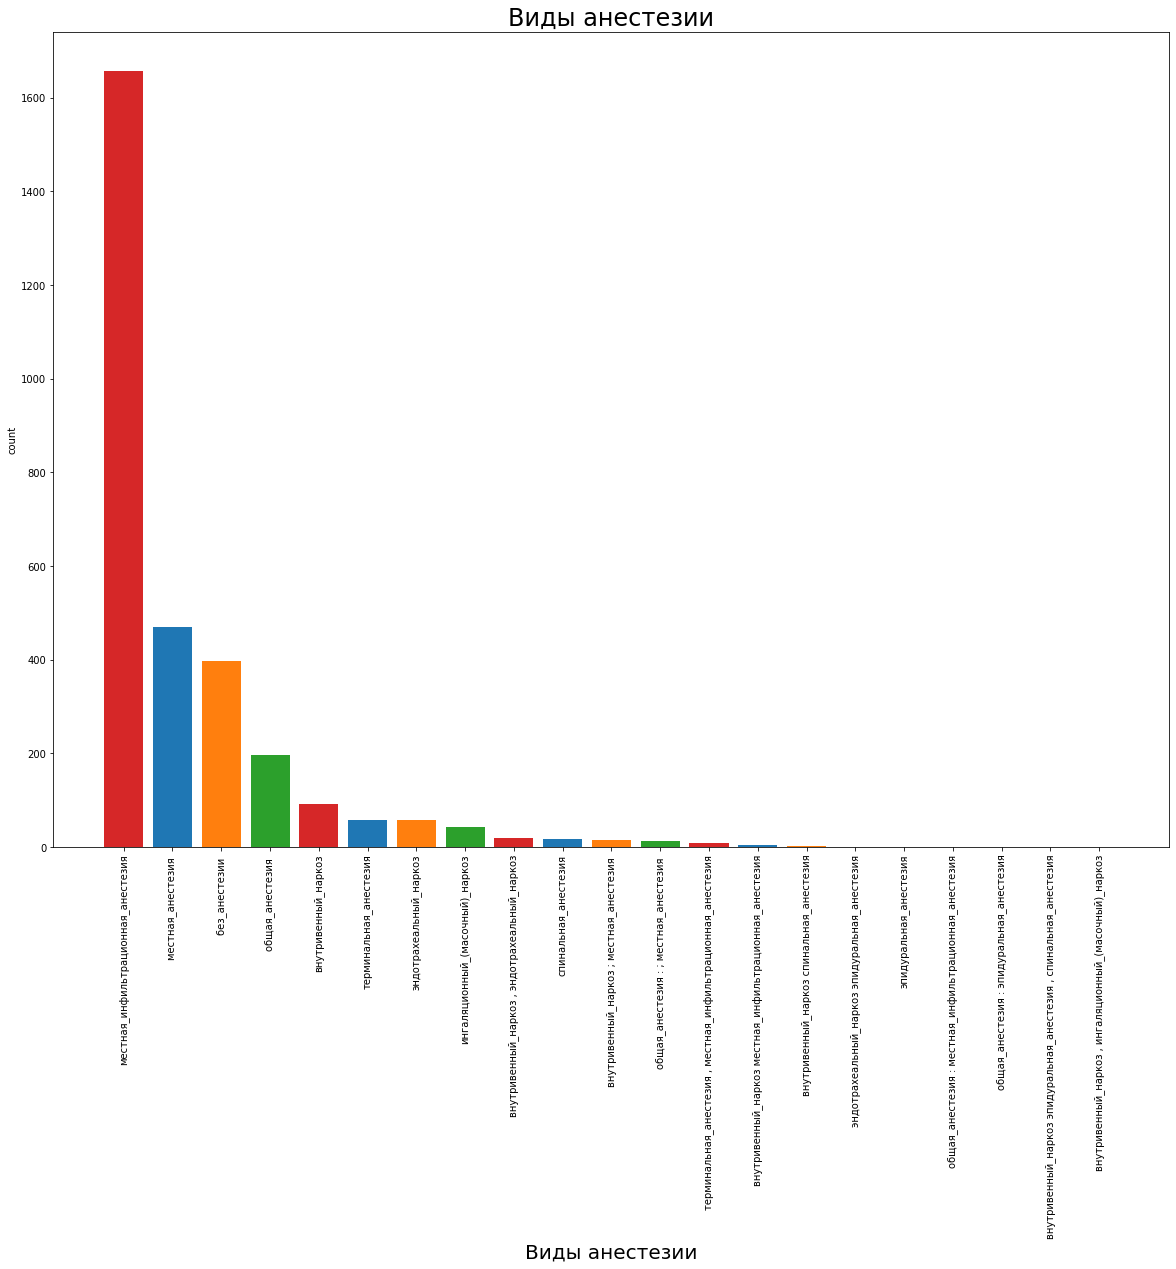

In [9]:
fig, ax = plt.subplots(figsize=(20, 15))

x = cnt['index']
y = cnt['panv']
plt.xticks(rotation=90)
plt.xlabel('Виды анестезии', fontsize=20)
bar_labels = ['red', 'blue', 'orange', 'yellow', 'green', 'dark blue', 'purpur']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange', 'tab:green']
plt.rcParams['font.size'] = '20'
ax.bar(x, y, label=x, color=bar_colors)
ax.set_ylabel('count')
ax.set_title('Виды анестезии')


plt.show()